In [ ]:
import numpy as np

# Data processing
import pandas as pd

#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Feature Scaling
from sklearn.preprocessing import StandardScaler

#Train and Test split
from sklearn.model_selection import train_test_split

#Classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

#Evaluation
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Social_Network_Ads.csv')

In [ ]:
df.shape

(400, 5)

In [ ]:
df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [ ]:
df


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

Visualize the distribution of the 'Purchased' variable

Purchased
0    257
1    143
Name: count, dtype: int64


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

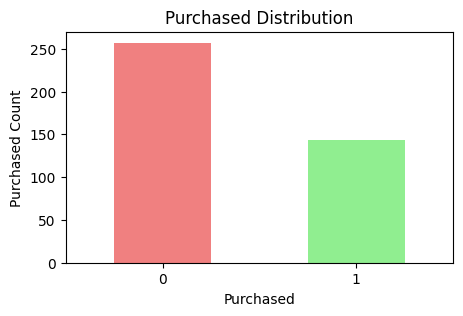

In [ ]:
print(df.value_counts('Purchased'))

plt.figure(figsize=(5, 3))
df['Purchased'].value_counts().plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Purchased Distribution')
plt.xlabel('Purchased')
plt.ylabel('Purchased Count')
plt.xticks(rotation = 0)

In [ ]:
def Calculate_purchase(df):
  purchased = 0
  not_purchased = 0
  for i in df["Purchased"]:
    if i == 0:
      not_purchased += 1
    else:
      purchased += 1
  return purchased, not_purchased

p, q = Calculate_purchase(df)
print(p, q)
print(" Purchased: ", (p/400)*100,"%")
print("Not Purchased: ", (q/400)*100,"%")

143 257
 Purchased:  35.75 %
Not Purchased:  64.25 %


In [ ]:
total_male = df['Gender'].value_counts()['Male']
total_female = df['Gender'].value_counts()['Female']

Visualize the relationship between 'Gender' and 'Purchased'


<Figure size 600x400 with 0 Axes>

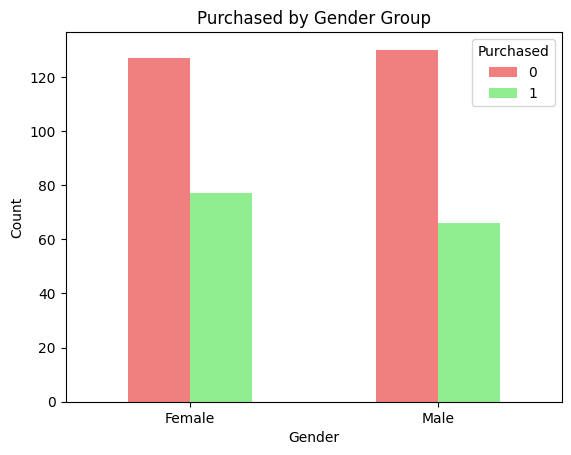

In [ ]:
plt.figure(figsize=(6, 4))
pd.crosstab(df['Gender'], df['Purchased']).plot(kind='bar', color=['lightcoral', 'lightgreen'])
plt.title('Purchased by Gender Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

Calculating the purchase rate for both male and female

In [ ]:
def Calculate_purchase(df):
  male_purchased = 0
  female_purchased = 0
  for i in range(len(df)):
    if df['Gender'][i] == "Male" and df['Purchased'][i] == 1:
       male_purchased +=1
    elif df['Gender'][i] == "Female" and df['Purchased'][i] == 1:
      female_purchased +=1

  return male_purchased, female_purchased

p, q = Calculate_purchase(df)

print("Male Purchased: ", (p/total_male)*100,"%")
print("Male not Purchased: ", 100-(p/total_male)*100,"%")
print("Female Purchased: ", (q/total_female)*100,"%")
print("Female not Purchased: ",100- (q/total_female)*100,"%")

Male Purchased:  33.6734693877551 %
Male not Purchased:  66.32653061224491 %
Female Purchased:  37.745098039215684 %
Female not Purchased:  62.254901960784316 %


Encoding the only catagorical variable "Gender"

In [ ]:
df = pd.get_dummies(df, columns=['Gender'])

In [ ]:
df.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,False,True
1,15810944,35,20000,0,False,True
2,15668575,26,43000,0,True,False
3,15603246,27,57000,0,True,False
4,15804002,19,76000,0,False,True


                  User ID       Age  EstimatedSalary  Purchased  \
User ID          1.000000 -0.000721         0.071097   0.007120   
Age             -0.000721  1.000000         0.155238   0.622454   
EstimatedSalary  0.071097  0.155238         1.000000   0.362083   
Purchased        0.007120  0.622454         0.362083   1.000000   
Gender_Female    0.025249  0.073741         0.060435   0.042469   
Gender_Male     -0.025249 -0.073741        -0.060435  -0.042469   

                 Gender_Female  Gender_Male  
User ID               0.025249    -0.025249  
Age                   0.073741    -0.073741  
EstimatedSalary       0.060435    -0.060435  
Purchased             0.042469    -0.042469  
Gender_Female         1.000000    -1.000000  
Gender_Male          -1.000000     1.000000  


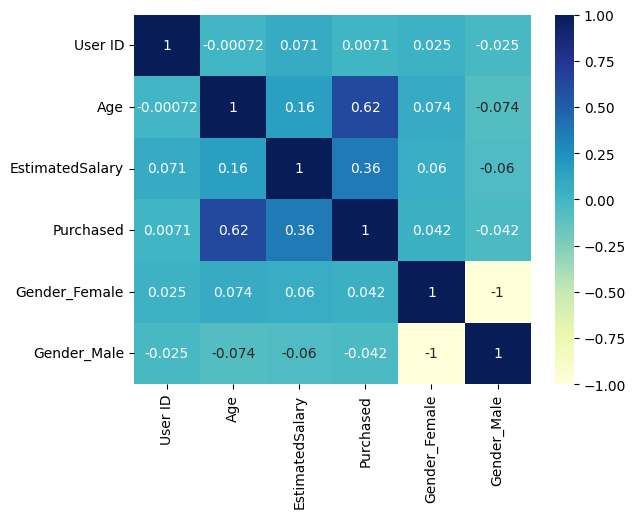

In [ ]:
print(df.corr())

# plotting correlation heatmap
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

Dropping unnecessary column

In [ ]:
df.drop('User ID', axis = 1, inplace=True)

Splitting the dataset


In [ ]:
X = df.drop(['Purchased'],axis = 1)
y = df['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)


Scaling the splitted dataset

In [ ]:
cols = X_train.columns
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train,columns=cols)
X_test = pd.DataFrame(X_test,columns=cols)

Applying KNN model

In [ ]:
classifierKNN = KNeighborsClassifier(n_neighbors = 5, metric = 'euclidean')
classifierKNN.fit(X_train, y_train)

y_pred = classifierKNN.predict(X_test)


cm1 = confusion_matrix(y_test,y_pred)
print(cm1)

print(classification_report(y_test, y_pred))

[[73  6]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



Applying SVM model

In [ ]:
classifierLin = SVC(kernel = 'linear')
classifierLin.fit(X_train, y_train)

y_pred_svc = classifierLin.predict(X_test)

cm2 = confusion_matrix(y_test, y_pred_svc)
print(cm2)

print(classification_report(y_test, y_pred_svc))

[[76  3]
 [13 28]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90        79
           1       0.90      0.68      0.78        41

    accuracy                           0.87       120
   macro avg       0.88      0.82      0.84       120
weighted avg       0.87      0.87      0.86       120



Applying Decision Tree Model

In [ ]:
decision_tree_model = DecisionTreeClassifier(criterion='gini', max_depth = 10, random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_dt = decision_tree_model.predict(X_test)

cm3 = confusion_matrix(y_test,y_pred)
print(cm3)

print(classification_report(y_test, y_pred))

[[73  6]
 [ 4 37]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        79
           1       0.86      0.90      0.88        41

    accuracy                           0.92       120
   macro avg       0.90      0.91      0.91       120
weighted avg       0.92      0.92      0.92       120



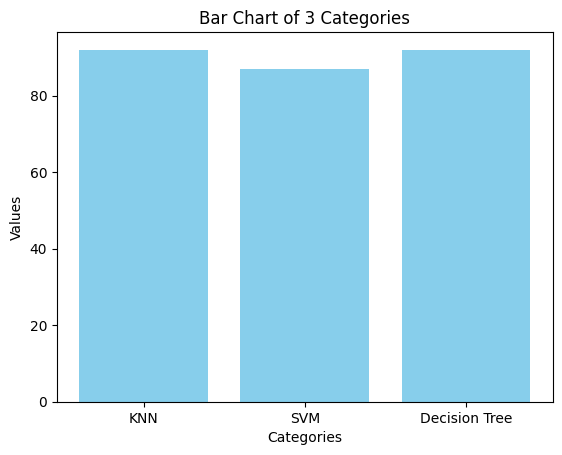

In [ ]:
categories = ['KNN', 'SVM', 'Decision Tree']
values = [92, 87, 92]  # Example values, you can replace them with your own data

# Create a bar chart
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Chart of 3 Categories')

# Show the plot
plt.show()